In [28]:
import pygor.load 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/contralateral_OT_singleplane/st66/'


In [29]:
filename = '2024-8-14_x240814_2_4cOT.h5'
data_object = pygor.load.Core(data_path+filename)

C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:64: UserWarning: 'wDataCh0_detrended' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.images = try_fetch(HDF5_file, "wDataCh0_detrended")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:75: UserWarning: 'Positions' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.ipl_depths = try_fetch(HDF5_file, "Positions")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")
C

<b>Find where rois are located</b>

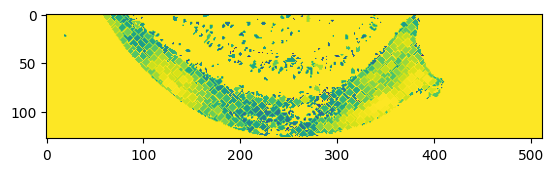

In [30]:
plt.imshow(data_object.rois)

<b>Get mean traces</b>

In [31]:
data_object.averages.shape 

(798, 30802)

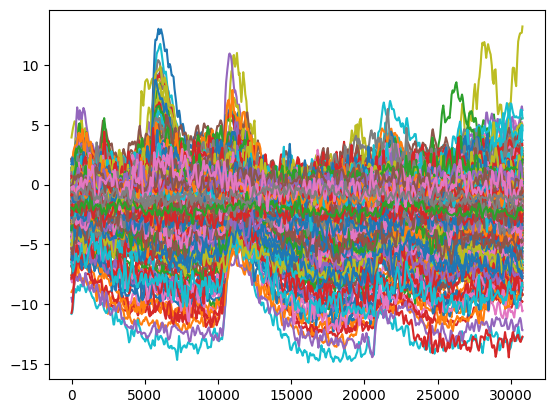

In [32]:
plt.plot(data_object.averages.transpose())

In [33]:
len(data_object.averages)

798

<b>Get stimulus triggers</b>

In [34]:
print(data_object.ms_dur)
print(data_object.frame_hz)
print(len(data_object.triggerstimes_frame))
print(data_object.linedur_s)
print(data_object.trigger_mode)


30802
3.9941205978393555
32
0.001955999992787838
9


In [35]:
def flexible_reshape(array, columns):
    # Calculate the number of elements to keep
    elements_to_keep = (len(array) // columns) * columns
    # Reshape the array
    reshaped_array = array[:elements_to_keep].reshape(-1, columns)
    return reshaped_array

triggertimes_ms = (data_object.triggerstimes_frame-data_object.triggerstimes_frame[0])/data_object.frame_hz/data_object.linedur_s

mean_triggertimes_ms = flexible_reshape(triggertimes_ms, data_object.trigger_mode)
mean_triggertimes_ms = np.mean(mean_triggertimes_ms, axis=0)-np.mean(mean_triggertimes_ms, axis=0)[0]

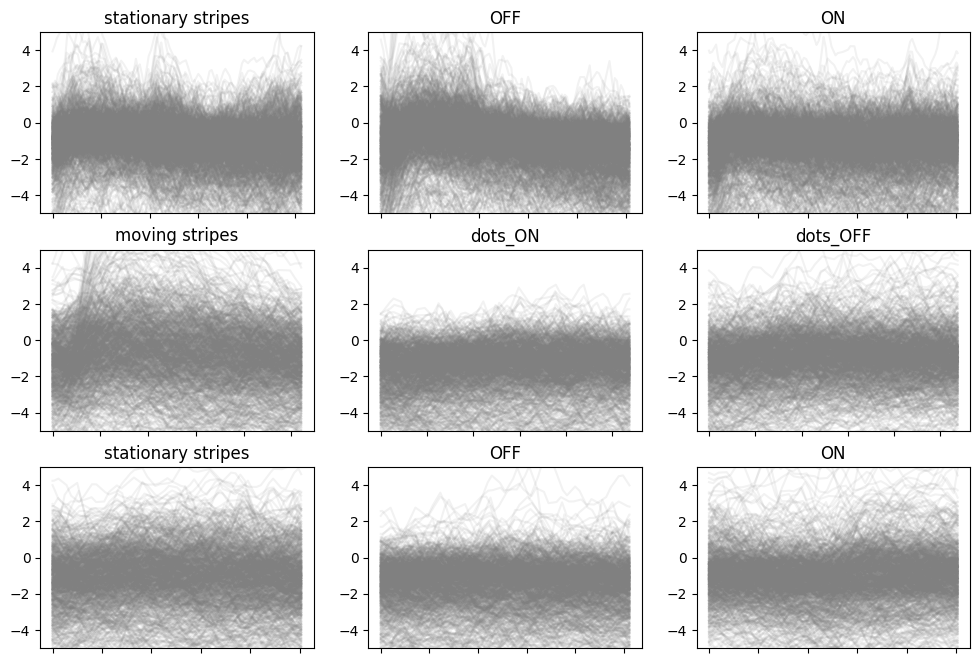

In [54]:
traces = data_object.averages
mean_triggertimes_extended = np.round(np.append(mean_triggertimes_ms, len(traces.transpose()))).astype(int)
stimtypes = ['stationary stripes','moving stripes','stationary stripes','OFF','dots_ON','OFF','ON','dots_OFF','ON',]
stim_responses = []

f, ax = plt.subplots(3, 3, figsize=(12, 8))

for idx, i in enumerate(mean_triggertimes_extended[:-1]):
    stim_responses.append(traces[:,i:mean_triggertimes_extended[idx+1]].transpose())  


for idx, i in enumerate(stim_responses):
    ax[idx%3, idx//3].plot(i, color='gray', alpha=0.1)  
    ax[idx%3, idx//3].set_xticklabels([])
    ax[idx%3, idx//3].set_title(stimtypes[idx])
    ax[idx%3, idx//3].set_ylim(-5, 5)

In [59]:
from sklearn import cluster

dots_OFF = stim_responses[4]-stim_responses[4][1,:]
dots_off = dots_OFF.transpose()

kmeans_data = cluster.KMeans(n_clusters=5, init='k-means++', random_state=0)

kmeans_data.fit(dots_off)

labels = kmeans_data.labels_
print(labels)


[1 1 1 4 4 1 3 2 4 2 2 4 1 1 1 1 4 4 4 1 1 4 3 1 1 2 4 4 2 1 4 0 4 1 1 4 4
 4 1 1 2 4 1 4 1 3 4 2 0 3 0 4 3 1 4 1 1 4 0 2 3 3 4 3 3 1 1 3 2 4 4 4 2 2
 1 1 4 2 0 1 4 2 4 2 2 4 3 3 2 3 4 4 3 1 3 2 1 3 4 2 0 1 1 1 1 1 4 1 4 0 4
 1 3 3 0 3 0 1 2 1 1 4 1 1 1 4 3 1 3 0 4 1 0 3 3 4 1 3 1 0 0 1 4 3 1 2 2 4
 1 4 4 1 2 4 2 3 4 1 3 3 3 3 1 3 1 0 4 3 4 3 1 0 1 0 3 4 3 3 3 4 2 3 3 1 0
 4 1 0 3 1 3 4 1 4 1 1 4 1 1 3 1 0 3 4 4 1 1 3 4 1 2 0 1 1 1 3 0 1 3 3 1 1
 1 0 4 1 1 2 2 4 0 1 1 1 1 4 4 4 3 2 3 3 1 0 1 3 1 0 0 3 3 4 3 3 3 0 3 0 1
 3 1 1 4 4 0 3 3 4 1 1 0 1 0 1 3 1 1 3 1 0 0 1 1 4 4 0 3 1 3 1 3 1 3 3 1 1
 1 3 4 1 1 1 4 3 4 3 1 0 1 3 3 0 3 1 1 1 1 0 4 0 3 1 3 1 3 1 3 3 0 3 3 1 3
 1 3 1 0 4 4 4 1 1 3 1 1 1 3 4 3 3 0 4 0 0 3 1 0 0 3 0 1 3 3 4 1 4 1 1 0 1
 1 1 1 3 3 1 3 3 4 2 1 3 3 3 4 1 4 1 1 3 4 3 1 3 0 0 3 1 3 4 4 4 0 3 3 2 0
 4 1 4 3 3 3 0 2 1 1 3 1 3 0 0 4 3 3 3 1 1 3 3 3 1 1 1 1 1 3 3 1 3 4 3 2 0
 2 1 3 1 1 3 4 3 1 1 1 1 3 1 3 1 1 1 4 1 3 1 0 0 4 3 4 0 3 1 3 1 0 1 3 1 1
 4 3 3 3 1 3 1 0 1 1 3 1 

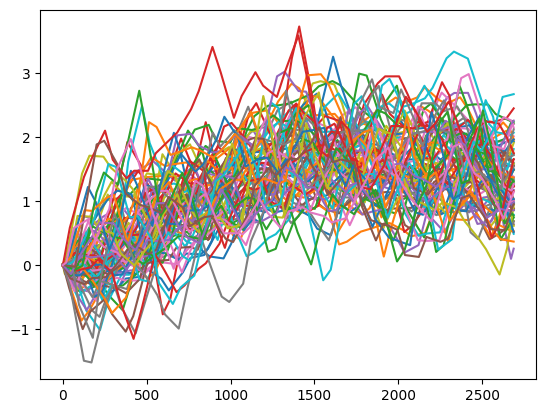

In [73]:
plt.plot(dots_off[labels==0,:].transpose())